# COM4043 — Assessment 1 Computing Skills Portfolio
## Tasks 2, 3 & 4 — Jupyter Notebook Submission

**Name:** Aof Krajangpho  
**Student ID:** 2407015  


> This notebook contains commented Python code and Markdown explanations for **Task 2 (visualisation)**, **Task 3 (simple data analysis)**, and **Task 4 (debugging/programming)**, 


## Setup
Import required libraries (NumPy, Matplotlib, SciPy) and set up a reproducible random seed.

In [7]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Reproducible seed based on student ID digits
myID = "2407015"
seed_value = sum(int(d) for d in myID)
random.seed(seed_value)
np.random.seed(seed_value)
seed_value


19

# TASK 2: Visualisation of Mathematical Functions

The assessment brief asks for two plots:

1. Plot the function  
\[
f(x) = e^{-x^2/3} + 3\sin\left(x+\frac{\pi}{4}\right)
\]  
using an array of \(x\) values in the range \([-2\pi, 2\pi]\).

2. Plot the parametric curve for \(0 \le t \le 2\pi\):  
\[
x(t) = 2\sin(t)\, e^{\cos(t)},\quad
y(t) = -\frac{3}{2}\cos(t)\, e^{\sin(2t)}
\]


## Task 2.1 — Plot $f(x)$ over $x\in[-2\pi, 2\pi]$

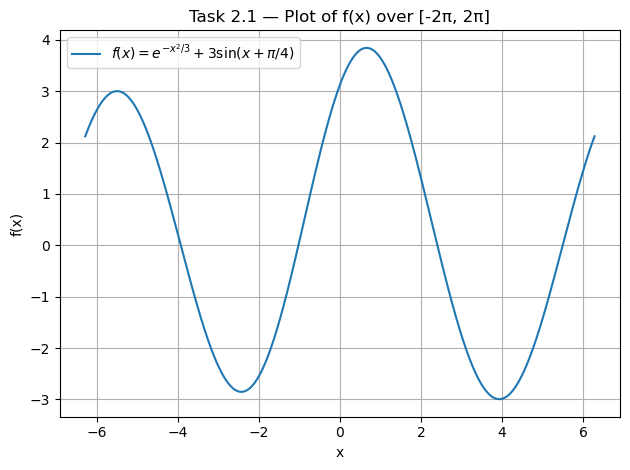

In [8]:
# Create an array of x values in [-2π, 2π]
x = np.linspace(-2*np.pi, 2*np.pi, 1000)

# Compute f(x) for each point
fx = np.exp(-(x**2)/3) + 3*np.sin(x + (np.pi/4))

# Plot f(x)
plt.figure()
plt.plot(x, fx, label=r"$f(x)=e^{-x^2/3}+3\sin(x+\pi/4)$")
plt.title("Task 2.1 — Plot of f(x) over [-2π, 2π]")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Task 2.2 — Plot the parametric curve $(x(t), y(t))$ for $0\le t\le 2\pi$

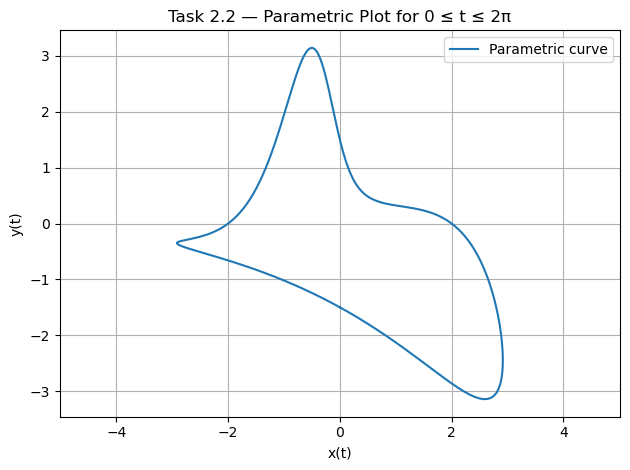

In [9]:
# Create a suitable array of t values (e.g., 200 points from 0 to 2π)
t = np.linspace(0, 2*np.pi, 200)

# Compute x(t) and y(t)
xt = 2*np.sin(t) * np.exp(np.cos(t))
yt = -(3/2) * np.cos(t) * np.exp(np.sin(2*t))

# Plot the resulting parametric curve
plt.figure()
plt.plot(xt, yt, label="Parametric curve")
plt.title("Task 2.2 — Parametric Plot for 0 ≤ t ≤ 2π")
plt.xlabel("x(t)")
plt.ylabel("y(t)")
plt.grid(True)
plt.axis("equal")  # keeps the curve proportions accurate
plt.legend()
plt.tight_layout()
plt.show()


# TASK 3: Simple Data Analysis

The goal is to explore how a random dataset behaves under (or compared with) a normal distribution.

**Requirements covered:**
- Generate **1,000 random values** (normal or uniform).
- Plot a **histogram**.
- Compute **mean, median, standard deviation**.
- Overlay a **best-fit normal curve** (using `scipy.stats.norm`).



## Task 3 — Generate data, plot histogram, compute statistics, and overlay best-fit normal curve

In [10]:
# Choose the distribution: "normal" or "uniform"
distribution = "normal"   # change to "uniform" if you want to compare against a flat distribution

n = 1000

if distribution == "normal":
    # Normal (Gaussian) distribution: mean=0, std=1
    data = np.random.normal(loc=0.0, scale=1.0, size=n)
elif distribution == "uniform":
    # Uniform distribution: values in [-3, 3] (roughly comparable width to N(0,1) visual range)
    data = np.random.uniform(low=-3.0, high=3.0, size=n)
else:
    raise ValueError("distribution must be 'normal' or 'uniform'")

# Descriptive statistics
data_mean = float(np.mean(data))
data_median = float(np.median(data))
data_std = float(np.std(data, ddof=0))  # population std for consistency with the fit

data_mean, data_median, data_std


(-0.036860255233361845, -0.0471011174033948, 0.9902606443148502)

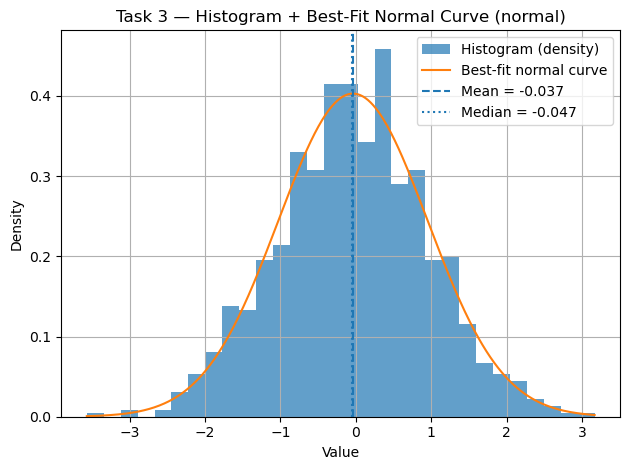

In [11]:
# Plot histogram (density=True so it can be compared to a PDF curve)
plt.figure()
count, bins, patches = plt.hist(data, bins=30, density=True, alpha=0.7, label="Histogram (density)")

# Best-fit normal curve using sample mean and std
x_fit = np.linspace(min(data), max(data), 400)
pdf_fit = norm.pdf(x_fit, loc=data_mean, scale=data_std)
plt.plot(x_fit, pdf_fit, label="Best-fit normal curve")

# Optional reference lines
plt.axvline(data_mean, linestyle="--", label=f"Mean = {data_mean:.3f}")
plt.axvline(data_median, linestyle=":", label=f"Median = {data_median:.3f}")

plt.title(f"Task 3 — Histogram + Best-Fit Normal Curve ({distribution})")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Task 3 Explanation of Histogram and Best-Fit Normal Curve

This figure shows how a simulated dataset compares with an ideal normal (Gaussian) distribution.

- **Data generation:**  
  The dataset contains 1,000 values sampled from a standard normal distribution \(N(0,1)\). The sample **mean**, **median**, and **standard deviation** are calculated from these values.

- **Histogram (blue bars):**  
  The histogram is plotted with `density=True`, meaning it represents a probability density rather than raw counts. The bars form a clear **bell-shaped** pattern, which is characteristic of normally distributed data.

- **Best-fit normal curve (orange line):**  
  The overlaid curve is a normal probability density function generated using the **sample mean** and **standard deviation**. Because it is fitted to the data, it closely follows the shape of the histogram.

- **Mean and median lines:**  
  The vertical dashed lines indicate the **mean** (≈ -0.037) and **median** (≈ -0.047). Their close values suggest **minimal skew**, confirming that the distribution is approximately symmetric.

- **Minor deviations:**  
  Small differences between the histogram and the fitted curve are expected due to **random sampling variation** and histogram binning. These fluctuations are normal for finite samples and do not indicate a non-normal distribution.


# TASK 4: Programming (Debugging + Completion + Explanation)

The assessment brief provides a snippet with bugs and incomplete sections. The requirements are:

1. Identify errors/bugs **and state how to debug them**.  
2. Debug the errors.  
3. Complete the tasks in the code (as indicated by comments).  
4. Explain the overall functionality of the snippet.


## Task 4 — Original Code

```python
# Add your name here
# Add your student ID here

import random
import matplotlib.pyplot as plt

# 1) Change myID to your own student ID. This MUST be your student ID.
myID = "111222"

# 2) User input validation
varCount = int(input("Enter an integer (>= 50): "))
# Complete the user variation here.
# The snippet should ask for an integer until the entered number is larger than 50.

# 3) randSeedNum
s_d = sum(int(d) for d in myID)
# Identify any errors and explain how the variable s_d is calculated
random.seed(ssd)

# 4) Random list creation
data = [random.randint(1, 200) for _ in range(varCount)]

# Compute the sum of data
# Add your code/response here

# Compute the mean of data
# Add your code/response here

# Compute the minimum and maximum of data
# Add your code/response here

# print the results
print(f"Sum: {data_sum}, Mean: {data_mean:.2f}, Min: {data_min}, Max: {data_max}")

# Plot a histogram of data

# Short commentary (in code comment or Markdown)
```


## Task 4 — Bugs identified and how to debug them

**Bugs / issues:**
- **Input validation is incomplete:** `varCount = int(input(...))` will crash if the user types non-numeric input, and it does not enforce `varCount >= 50`.
- **Incorrect variable name in seed:** `random.seed(ssd)` uses `ssd` which is **undefined**; the correct variable calculated is `s_d`.
- **Missing calculations:** `data_sum`, `data_mean`, `data_min`, and `data_max` are referenced in the print statement but never defined.
- **Histogram step is missing:** the plotting section is not implemented.

**How to debug (method):**
- Run the code and read the **traceback** to identify the exact failing line (e.g., `NameError` for `ssd`, `ValueError` for invalid integer conversion).
- Inspect variables and types during execution (e.g., print or check values in Jupyter).
- Fix one error at a time, re-run, and confirm the output matches the requirement (≥ 50 values, seeded randomness, correct summary stats, and a histogram).


Seed (sum of ID digits): 19
Count: 69
Sum: 6757, Mean: 97.93, Min: 5, Max: 199


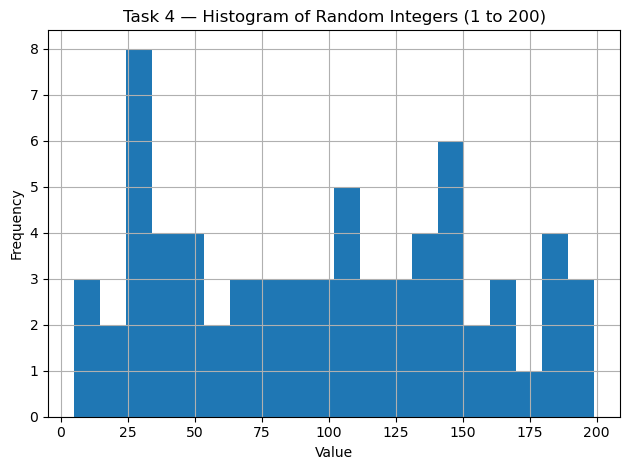

In [12]:
# ---- Task 4: Debugged and completed solution ----


import random
import matplotlib.pyplot as plt

# 1) Student ID 
myID = "2407015"

# 2) User input validation:
# Keep asking until we receive an integer >= 50.

# Note: If this cell is run in a non-interactive environment (no stdin),
# it will fall back to varCount = 50 so the notebook still runs end-to-end.
while True:
    try:
        raw = input("Enter an integer (>= 50): ")
        varCount = int(raw)
        if varCount >= 50:
            break
        print("The number must be at least 50. Please try again.")
    except ValueError:
        print("Invalid input. Please enter an integer (e.g., 50, 100, 250).")
    except EOFError:
        varCount = 50
        print("No interactive input detected. Using default varCount = 50.")
        break

# 3) randSeedNum:
# s_d is calculated by converting each digit in myID to an integer and summing them.
s_d = sum(int(d) for d in myID)

# Corrected: use s_d (not an undefined variable)
random.seed(s_d)

# 4) Random list creation
data = [random.randint(1, 200) for _ in range(varCount)]

# Compute summary statistics
data_sum = sum(data)
data_mean = data_sum / len(data)
data_min = min(data)
data_max = max(data)

# Print the results
print(f"Seed (sum of ID digits): {s_d}")
print(f"Count: {len(data)}")
print(f"Sum: {data_sum}, Mean: {data_mean:.2f}, Min: {data_min}, Max: {data_max}")

# Plot a histogram of data
plt.figure()
plt.hist(data, bins=20)
plt.title("Task 4 — Histogram of Random Integers (1 to 200)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


## Explanation of Task 4 Histogram

This histogram visualises the distribution of randomly generated integers between **1 and 200**.

- **Data source:**  
  The values are produced using a seeded random generator, ensuring the results are **reproducible**. The number of values depends on validated user input (minimum of 50).

- **Histogram structure:**  
  The x-axis represents the **value range (1–200)**, while the y-axis shows the **frequency** of numbers within each bin. The data are grouped into 20 bins, allowing patterns to be observed clearly.

- **Distribution pattern:**  
  The bars appear **evenly spread** across the range, which is expected because the numbers are generated using a uniform random process. No strong clustering or skew is evident.

- **Interpretation:**  
  This plot confirms that values are distributed fairly across the full interval, demonstrating how uniform random sampling behaves in practice.

- **Statistical support:**
  The histogram complements the calculated statistics (sum, mean, min, max) by providing a visual representation of how those values are distributed. For example, the mean should fall near the center of the histogram if the distribution is uniform.

Overall, the histogram provides a clear visual summary of the dataset’s spread and supports the numerical statistics calculated earlier.

```python workspace# 